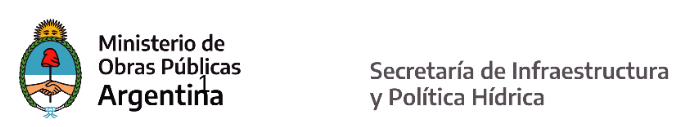

# **Introducción al procesamiento de datos de radar**

### Python:
Python es un lenguaje de programación ampliamente utilizado en las aplicaciones web, el desarrollo de software, la ciencia de datos y el machine learning (ML). Los desarrolladores utilizan Python porque es eficiente y fácil de aprender, además de que se puede ejecutar en muchas plataformas diferentes. El software Python se puede descargar gratis, se integra bien a todos los tipos de sistemas y aumenta la velocidad del desarrollo.

### Google Colab (Colaboratory):
Colaboratory, o "Colab" para abreviar, es un producto de Google Research. Permite a cualquier usuario escribir y ejecutar código arbitrario de Python en el navegador. Es especialmente adecuado para tareas de aprendizaje automático, análisis de datos y educación.

### Py-ART:
Py-ART es un módulo que consiste en un conjunto de herramientas y algoritmos, de acceso libre, para trabajar con datos de radares meteorológicos. Las mismas están basadas en el lenguaje de programación Python y son muy utilizadas por la comunidad de usuarios.


### Links útiles:
*   Qué es Python?: https://aws.amazon.com/es/what-is/python/
*   Google Colab: https://colab.research.google.com/?hl=es
*   Documentación Py-ART: https://py-art.readthedocs.io/en/latest/
*   Github: https://arm-doe.github.io/pyart/



*Contacto: matias.suarez@unc.edu.ar*


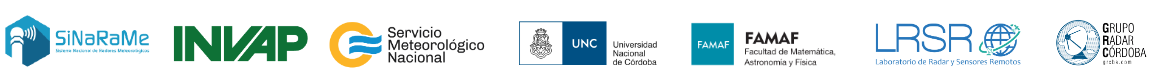

## **Primeramente se deben instalar las librerías específicas**

In [11]:
# Instalamos arm_pyart y cartopy
!pip install cartopy
!pip install arm_pyart

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.6.0
    Uninstalling fsspec-2023.6.0:


## **Importamos las librerías**

<font color='green'>**Los comentarios (lineas que no son leidas en la ejecución) se indican con un # al principio**</font>

In [12]:
# Importamos librerias necesarias para trabajar
import pyart                                                                # Libreria para trabajar con datos de radar PyART
import glob                                                                 # Expansión del patrón de nombres de ruta de estilo Unix (glob)
import matplotlib.pyplot as plt                                             # Libreria para graficar matplotlib
import cartopy.crs as ccrs                                                  # Libreria para graficar mapas georeferenciados (cartopy)
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import os                                                                   # Interfaces misceláneas del sistema operativo (os)
import sys                                                                  # Parámetros y funciones específicos del sistema (sys)
import numpy as np                                                          # cálculo numérico y el análisis de datos (numpy)
import warnings                                                             # Control de advertencias (warnings e ignore warnings)
warnings.filterwarnings('ignore')


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



## **Descargamos los archivos necesarios para trabajar**


*   Volumenes del radar RMA1
*   Shapefiles de la provincia de Córdoba
*   Modulos con funciones de python



In [13]:
# Descargamos el modulo colores.py
!wget -O colores.py https://www.dropbox.com/scl/fi/x7rcbt2isepyoqkrvy7hb/colores.py?rlkey=endt973hpzggeadox6jzfmxyp&st=slva4n5p&dl=0
print('\n')

# Descargamos el modulo funciones_radar.py
!wget -O funciones_radar.py https://www.dropbox.com/scl/fi/dj1nsqbefb54toxotwp6j/funciones_radar.py?rlkey=hgh6ewv6bmtvs3a85r71hyrtc&st=f7h3jpry&dl=0
print('\n')

# Descargamos algunos datos de radar para trabajar
!wget -O Datos_Radar.zip https://www.dropbox.com/scl/fi/uhl3t2vpx9pw7m9qkxpav/Datos_Radar.zip?rlkey=h49t87qf8av7gjj727mm6ug6p&st=bbcapqck&dl=0
print('\n')

# Descargamos shapefiles con los límites departamentales de Córdoba
!wget -O Shapes.zip https://www.dropbox.com/scl/fi/695odexr63ta88u4d896w/Shapes.zip?rlkey=wubfxltipp4ivmh0mawq7e462&st=uviug56h&dl=0

--2024-04-17 17:45:50--  https://www.dropbox.com/scl/fi/x7rcbt2isepyoqkrvy7hb/colores.py?rlkey=endt973hpzggeadox6jzfmxyp
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uca02d0344d528610683841f3602.dl.dropboxusercontent.com/cd/0/inline/CRPQssiGCoz6ByKwRlJLoiPZ4aG1W-n561EGa0fVSGHDWd5fF0vUWXCdFi3fCfSxUKqD2iDhD3ZDKFNpvJReWWdMV4-v8aoOksZmKfmEst5VXHwM48fwnnP9V0C0soA-rZ-hTpJNhx3m84Zy7ToaOHbR/file# [following]
--2024-04-17 17:45:52--  https://uca02d0344d528610683841f3602.dl.dropboxusercontent.com/cd/0/inline/CRPQssiGCoz6ByKwRlJLoiPZ4aG1W-n561EGa0fVSGHDWd5fF0vUWXCdFi3fCfSxUKqD2iDhD3ZDKFNpvJReWWdMV4-v8aoOksZmKfmEst5VXHwM48fwnnP9V0C0soA-rZ-hTpJNhx3m84Zy7ToaOHbR/file
Resolving uca02d0344d528610683841f3602.dl.dropboxusercontent.com (uca02d0344d528610683841f3602.dl.dropboxusercontent.com)... 162.125.80.15, 2620:

## **Descomprimimos los .zip descargados anteriormente**

In [15]:
# unzip es la herramienta para descomprimir, -f permite forzar la escritura si el directorio existe
!unzip -f Datos_Radar.zip
!unzip -f Shapes.zip

Archive:  Datos_Radar.zip
Archive:  Shapes.zip


## **Cómo cargamos los datos desde nuestro Drive?**

## <font color='red'>**Si hemos descargado los datos anteriores no realizar este paso**</font>

### **Montamos nuestro drive para que podamos cargar los archivos que están allí (hacer click en conectar y luego permitir).**

In [ ]:
# Cargamos nuestro drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Indicamos al código donde están guardados los volumenes de radar**

In [ ]:
# Declaramos donde estan guardados los volumenes de radar
dir_radar = "/content/drive/MyDrive/Curso-Radar/Datos_Radar"

In [ ]:
# Listamos todos los archivos en el directorio y los guardamos en una lista
lista_de_archivos = sorted(glob.glob(dir_radar+'/*.nc'))
lista_de_archivos

['/content/drive/MyDrive/Curso-Radar/Datos_Radar/RMA1_0303_01_20221209T230832Z.nc',
 '/content/drive/MyDrive/Curso-Radar/Datos_Radar/RMA1_0303_01_20221209T232132Z.nc',
 '/content/drive/MyDrive/Curso-Radar/Datos_Radar/RMA1_0303_01_20221209T233433Z.nc',
 '/content/drive/MyDrive/Curso-Radar/Datos_Radar/RMA1_0303_01_20221209T235933Z.nc',
 '/content/drive/MyDrive/Curso-Radar/Datos_Radar/RMA1_0303_01_20221210T001231Z.nc',
 '/content/drive/MyDrive/Curso-Radar/Datos_Radar/RMA1_0303_01_20221210T002529Z.nc',
 '/content/drive/MyDrive/Curso-Radar/Datos_Radar/RMA1_0303_01_20221210T003829Z.nc',
 '/content/drive/MyDrive/Curso-Radar/Datos_Radar/RMA1_0303_01_20221210T005132Z.nc']

In [ ]:
# Llamamos de la lista al primer elemento
lista_de_archivos[0]

'/content/drive/MyDrive/Curso-Radar/Datos_Radar/RMA1_0303_01_20221209T230832Z.nc'

## **Indicamos al código donde están guardados los volumenes de radar**

In [45]:
# Listamos todos los archivos en el directorio y los guardamos en una lista
lista_de_archivos = sorted(glob.glob('./Datos_Radar/*.nc'))
lista_de_archivos

['./Datos_Radar/RMA1_0303_01_20221209T230832Z.nc',
 './Datos_Radar/RMA1_0303_01_20221209T232132Z.nc',
 './Datos_Radar/RMA1_0303_01_20221209T233433Z.nc',
 './Datos_Radar/RMA1_0303_01_20221209T235933Z.nc',
 './Datos_Radar/RMA1_0303_01_20221210T001231Z.nc',
 './Datos_Radar/RMA1_0303_01_20221210T002529Z.nc',
 './Datos_Radar/RMA1_0303_01_20221210T003829Z.nc',
 './Datos_Radar/RMA1_0303_01_20221210T005132Z.nc']

In [17]:
# Llamamos de la lista al primer elemento
lista_de_archivos[0]

'./Datos_Radar/RMA1_0303_01_20221209T232132Z.nc'

## **Abrimos un volumen de radar con la función *pyart.io.read***

In [18]:
# Linea para la apertura del archivo o volumen de radar
radar = pyart.io.read(lista_de_archivos[0])

## **Visualizamos las variables que hay dentro del volumen**

In [ ]:
# info del volumen de radar
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: altitud
	units: metros
	standard_name: Altitude
	positive: up
	possitive:: arriba
	_fillValue: -9999.0
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (5400,)>
	long_name: azimuth_angle_from_true_north
	units: degrees
	standard_name: beam_azimuth_angle
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float32 and shape: (5400,)>
	long_name: elevation_angle_from_horizontal_plane
	units: degrees
	standard_name: beam_elevation_angle
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	WRAD:
		data: <ndarray of type: float32 and shape: (5400, 523)>
		units: m/s
	KDP:
		data: <ndarray of type: float32 and shape: (5400, 523)>
		units: deg/km
	DBZV:
		data: <ndarray of type: float32 and shape: (5400, 523)>
		units: dBZ
	DBZH:
		data: <ndarray of type

In [19]:
# Visualizamos las variables disponibles en el volumen de radar (keys)
radar.fields.keys()

dict_keys(['DBZV', 'KDP', 'DBZH', 'ZDR', 'WRAD', 'VRAD', 'RHOHV', 'PHIDP'])

In [20]:
# Visualizamos como es la matriz de datos de una variable en particular
radar.fields['DBZH']

{'units': 'dBZ',
 'data': masked_array(
   data=[[4.347937107086182, 41.23040008544922, 27.02056884765625, ...,
          --, --, --],
         [--, --, --, ..., --, --, --],
         [--, 32.9589729309082, 22.215913772583008, ..., --, --, --],
         ...,
         [-12.07913875579834, -12.187039375305176, --, ..., --, --, --],
         [-6.475133419036865, -15.005411148071289, --, ..., --, --, --],
         [-7.24755334854126, -3.25466251373291, -23.257841110229492, ...,
          --, --, --]],
   mask=[[False, False, False, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True, False, False, ...,  True,  True,  True],
         ...,
         [False, False,  True, ...,  True,  True,  True],
         [False, False,  True, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True]],
   fill_value=9.96921e+36,
   dtype=float32)}

## **Podemos ver también que información tiene este volumen**

## **Graficamos las variables que tiene el volumen**


In [21]:
# Importamos mapa de colores personalizados diseñados por el Grupo Radar Córdoba (@GrupoRadarCBA en Twitter/X)
# Si los archivos están en nuestro drive ejecutar esta parte para indicarle a python donde encontrar el modulo colores.py

# *************************************************************
# py_file_location = "/content/drive/MyDrive/Curso-Radar"
# sys.path.append(os.path.abspath(py_file_location))
# *************************************************************

# Colormaps del GRC
import colores

## **Patrón de elevación del radar**
Debido a la curvatura terrestre y a efectos de refracción en la atmósfera, el patrón volumétrico del radar meteorológico tiene el siguiente aspecto:

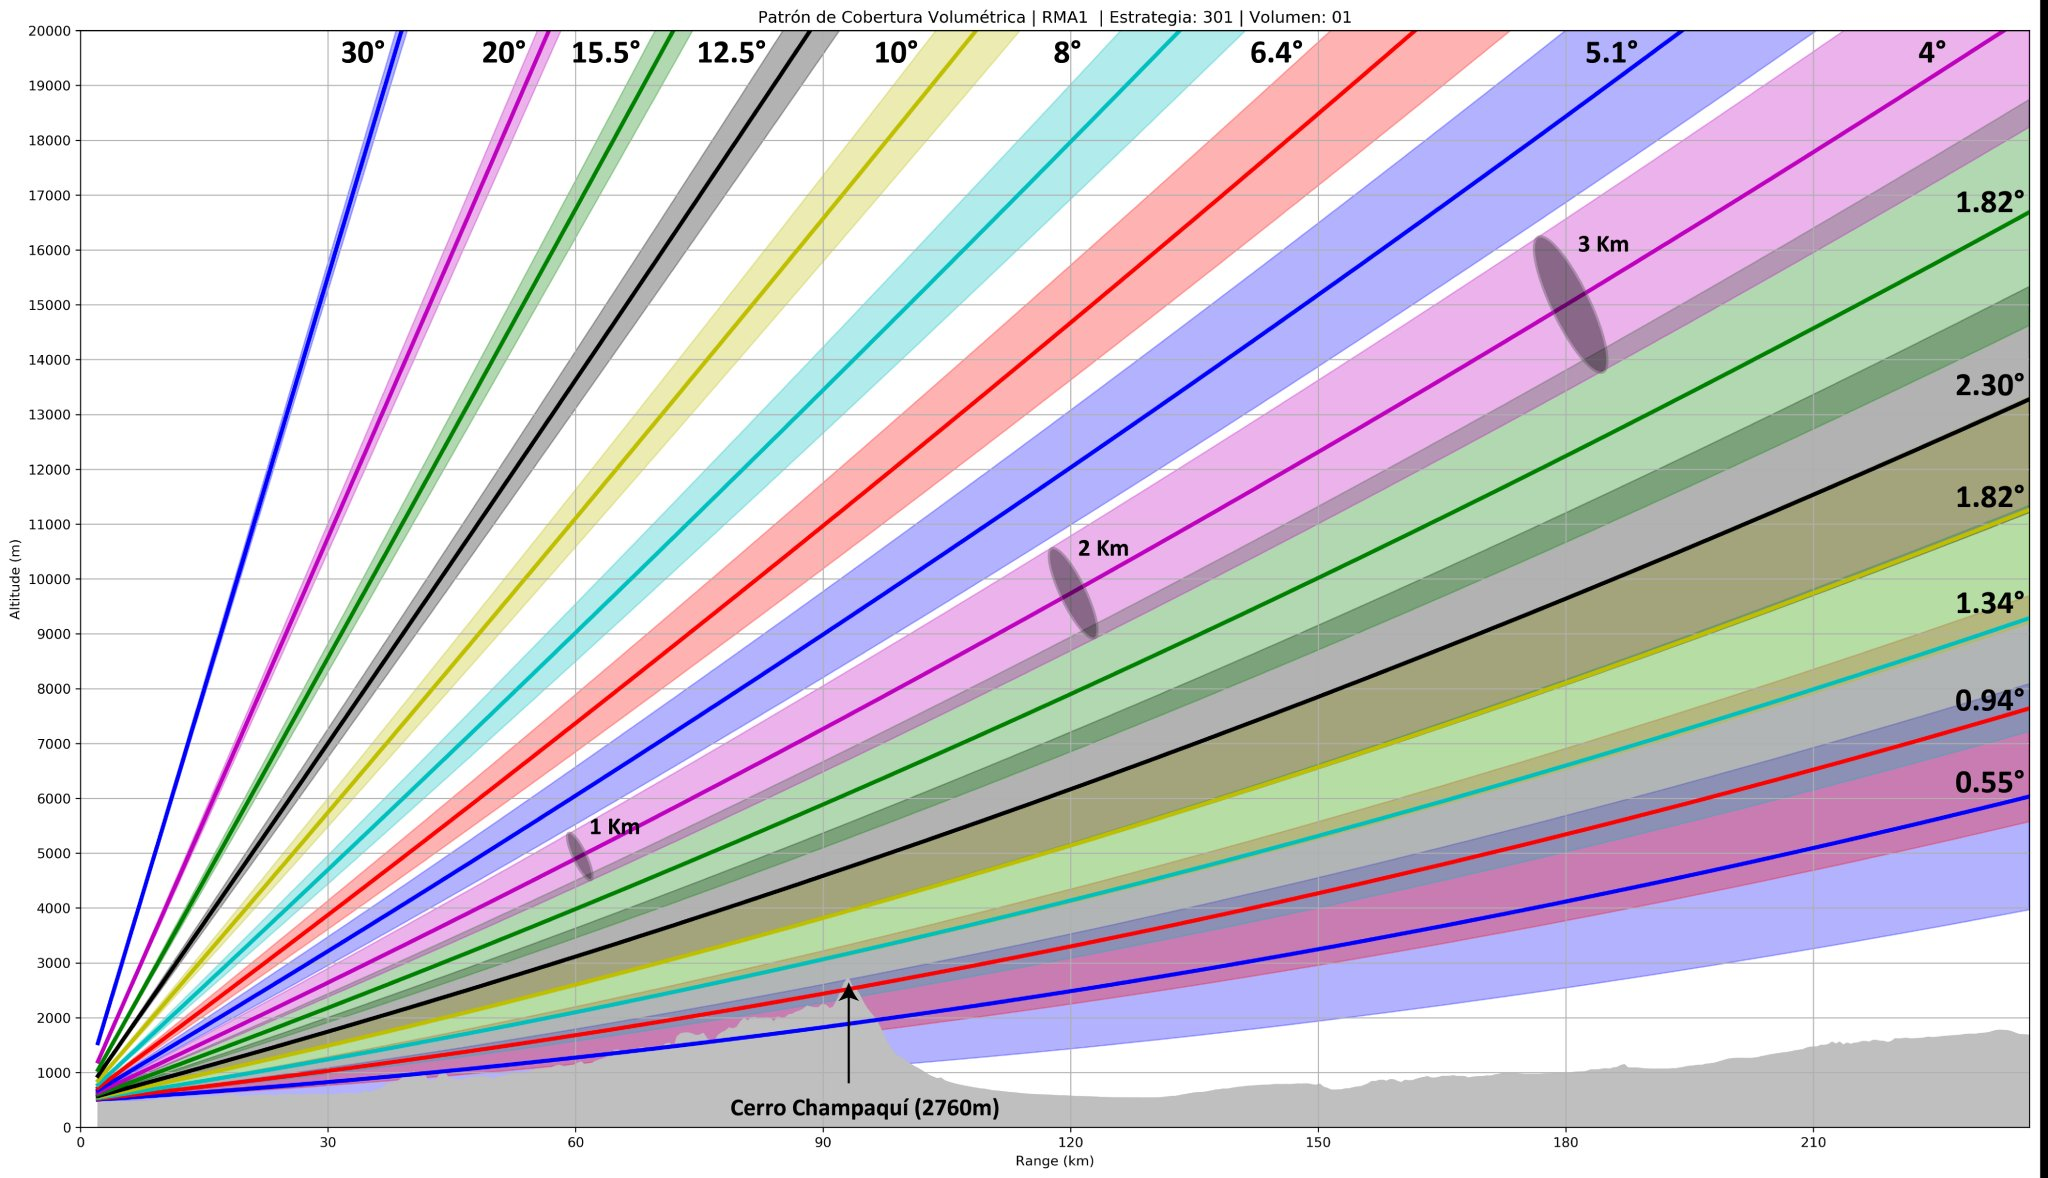

## **Realizamos un gráfico simple del factor de reflectividad DBZH**

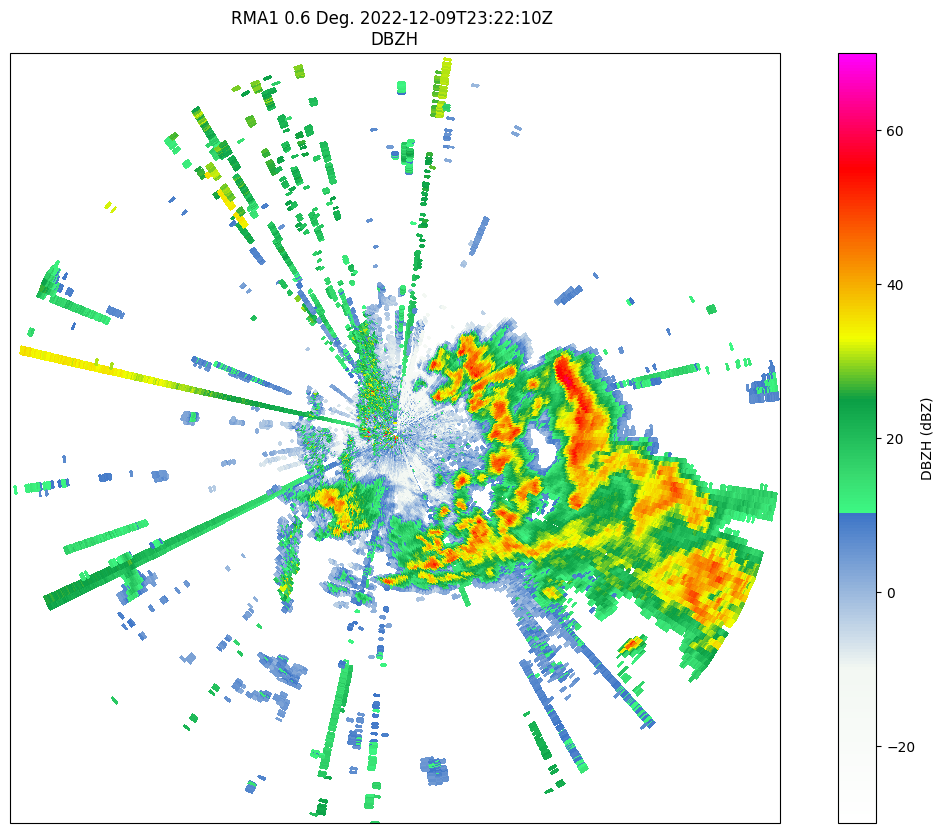

In [22]:
# Creamos objeto figura y le asignamos un tamaño
fig = plt.figure(figsize=(15,10))
# Creamos un objeto display con los datos del volumen
display = pyart.graph.RadarMapDisplay(radar)

# Definimos la proyección con la que vamos a graficar
projection = ccrs.Mercator() #PlateCarree

# Grafico de DBZH
ax1 = plt.subplot(1, 1, 1, projection=projection)
display.plot_ppi_map(field='DBZH', sweep=0, vmin = -30, vmax = 70,
                     cmap='grc_th', ax=ax1,
                     projection=projection)

## **Realizamos el gráfico de DBZH, ZDR, RHOHV y KDP**

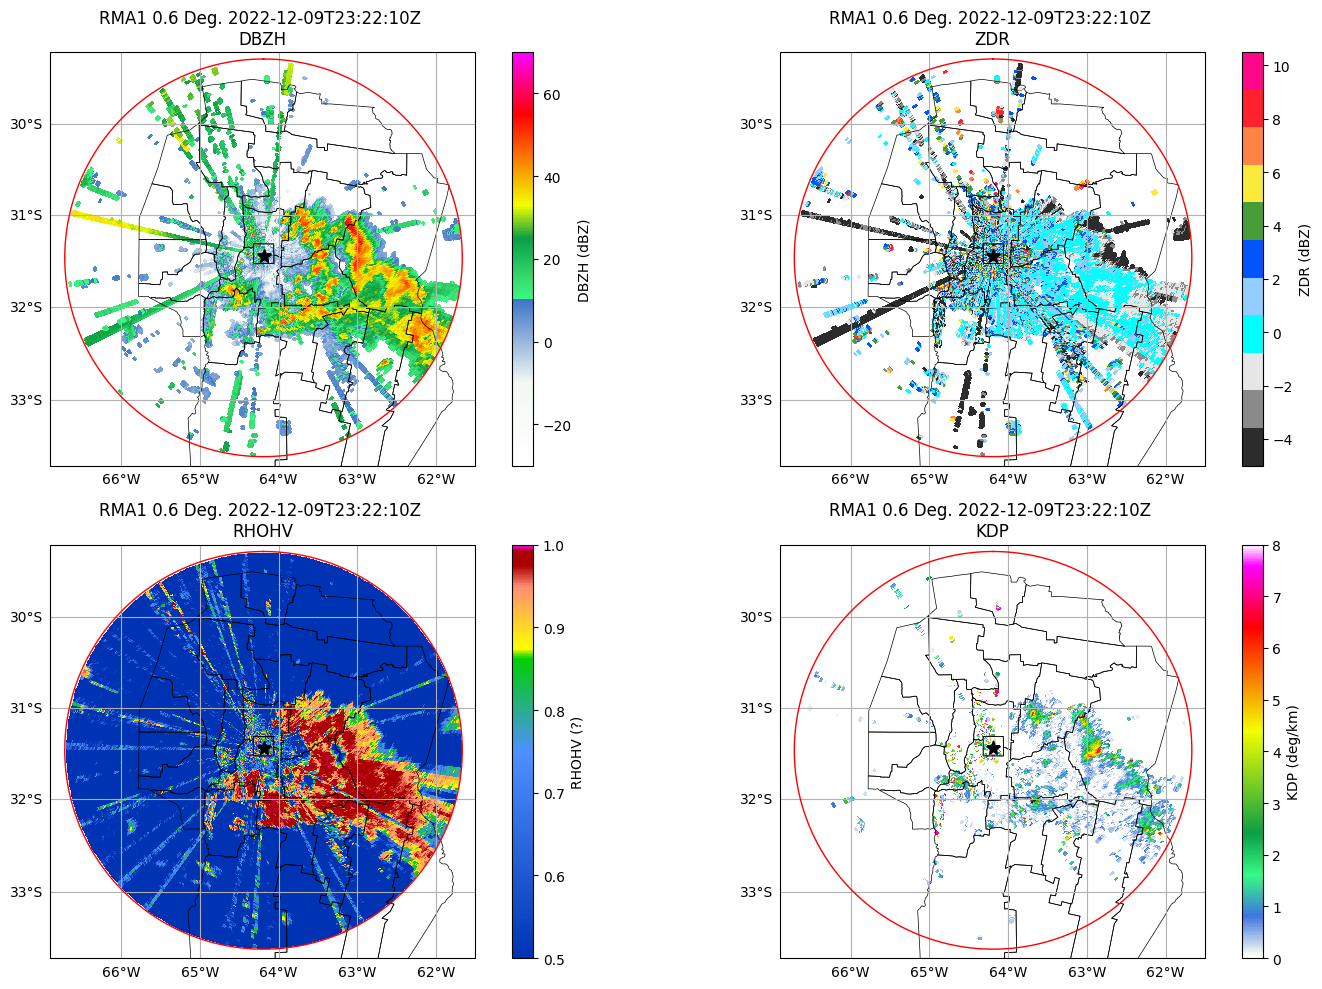

In [24]:
##########################################################################################################################
##########################################################################################################################
# Elevacion de la antena que queremos graficar
elevacion = 0

# Configuramos ventana de visualizacion
min_lon=-66.9
max_lon=-61.5
min_lat=-33.7
max_lat=-29.2

#min_lon=-63.8
#max_lon=-62.7
#min_lat=-31.7
#max_lat=-30.8
##########################################################################################################################
##########################################################################################################################

fig = plt.figure(figsize=(15,10))
display = pyart.graph.RadarMapDisplay(radar)

fig.patch.set_visible(False)

# Indicar en donde están nuestros shapefiles
# path_shapes = '/content/drive/MyDrive/Curso-Radar/Shapes/cba_deptos.shp'
path_shapes = './Shapes/cba_deptos.shp'

shapes_kwargs = {'zorder':1,'facecolor':'None', 'edgecolor':'black', 'alpha':1,'lw':.5}
projection = ccrs.Mercator() #PlateCarree

# Grafico de DBZH
         #(filas, columnas, elemento)
ax1 = plt.subplot(2, 2, 1, projection=projection)
display.plot_ppi_map('DBZH', elevacion, vmin = -30, vmax = 70, cmap='grc_th', ax=ax1,
                     projection=projection, lat_0=radar.latitude['data'][0], lon_0=radar.longitude['data'][0],
                     lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66], # paralelos y meridianos para agregar al mapa
                     shapefile=path_shapes, shapefile_kwargs=shapes_kwargs,
                     min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat)
# Graficamos un punto de referencia en el mapa
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', color='black', ms=10)
# display.plot_point(-63.571418834631224, -32.04548956046992, '.', color='black', ms=10)
# Graficamos circunferencias de radio (en km) definido en la lista
display.plot_range_rings([240], ax=None, lw=1, col='red')

# Grafico de ZDR
ax2 = plt.subplot(2, 2, 2, projection=projection)
display.plot_ppi_map('ZDR', elevacion, vmin = -5, vmax = 10.5, cmap='grc_zdr', ax=ax2,
                     projection=projection, lat_0=radar.latitude['data'][0], lon_0=radar.longitude['data'][0],
                     lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66], # paralelos y meridianos para agregar al mapa
                     shapefile=path_shapes, shapefile_kwargs=shapes_kwargs,
                     min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat)
# Graficamos un punto de referencia en el mapa
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', color='black', ms=10)
# Graficamos circunferencias de radio (en km) definido en la lista
display.plot_range_rings([240], ax=None, lw=1, col='red')

# Grafico de RHOHV
ax3 = plt.subplot(2, 2, 3, projection=projection)
display.plot_ppi_map('RHOHV', elevacion, vmin = 0.5, vmax = 1, cmap='grc_rho', ax=ax3,
                     projection=projection, lat_0=radar.latitude['data'][0], lon_0=radar.longitude['data'][0],
                     lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66], # paralelos y meridianos para agregar al mapa
                     shapefile=path_shapes, shapefile_kwargs=shapes_kwargs,
                     min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat)
# Graficamos un punto de referencia en el mapa
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', color='black', ms=10)
# Graficamos circunferencias de radio (en km) definido en la lista
display.plot_range_rings([240], ax=None, lw=1, col='red')

# Grafico de KDP
ax4 = plt.subplot(2, 2, 4, projection=projection)
display.plot_ppi_map('KDP', elevacion, vmin = 0, vmax = 8, cmap='grc_rain', fig=fig, ax=ax4,
                     projection=projection, lat_0=radar.latitude['data'][0], lon_0=radar.longitude['data'][0],
                     lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66], # paralelos y meridianos para agregar al mapa
                     shapefile=path_shapes, shapefile_kwargs=shapes_kwargs,
                     min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat)
# Graficamos un punto de referencia en el mapa
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', color='black', ms=10)
# Graficamos circunferencias de radio (en km) definido en la lista
display.plot_range_rings([240], ax=None, lw=1, col='red')

plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Curso_Radar_UNC-FaMAF/PPIx4.png', dpi=150, transparent=False)
plt.show()

## **Graficamos un corte pseudo radial**

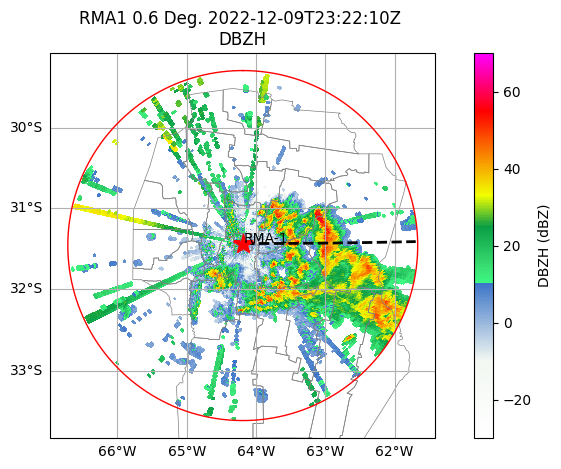

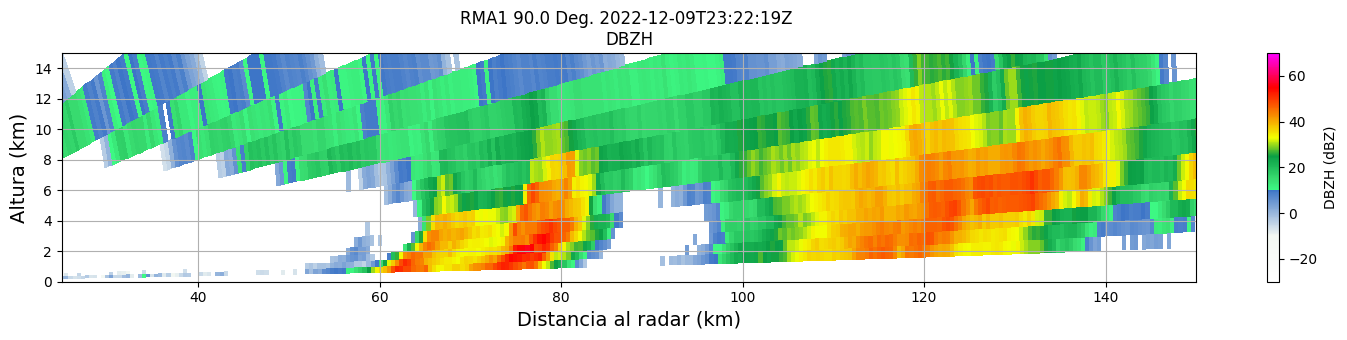

In [25]:
##########################################################################################################################
##########################################################################################################################

# Definimos el radial de interés (de 0 a 360 grados contando desde el norte en sentido horario)
radial = 90

# Definimos la elevación de antena que queremos graficar
elevacion = 0

# Configuramos limites distancia al radar (xlim) y altura (ylim) en km
xlim = [25,150]
ylim = [0,15]

##########################################################################################################################
##########################################################################################################################
projection = ccrs.Mercator() #PlateCarree

# Extraemos la información necesaria para graficar una línea radial sobre el PPI
indice_inicial = radar.sweep_start_ray_index['data'][elevacion]
indice_final   = radar.sweep_end_ray_index['data'][elevacion]
# Extraemos los azimuths para la elevación indicada (p ej. para elevacion 0 devuelve 0,1,...,358,359)
azimuths = radar.azimuth['data'][indice_inicial:indice_final]
# Buscamos el índice del azimuth más cercano al radial requerido
indice_aximuth = np.argmin(np.abs(azimuths-radial))
# Extraemos las latitudes y longitudes de los puntos
lat_azimuth, lon_azimuth, altitud = radar.get_gate_lat_lon_alt(elevacion)

# Abrimos una nueva figura
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1, 1, 1, projection=projection)

display = pyart.graph.RadarMapDisplay(radar)
# Graficamos el PPI
display.plot_ppi_map('DBZH', elevacion, vmin = -30, vmax = 70, cmap='grc_th', projection=projection, ax=ax1, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0], lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66],
                     shapefile=path_shapes, shapefile_kwargs={'zorder':1,'facecolor':'None', 'edgecolor':'grey', 'alpha':1,'lw':.5}
                     )
# Graficamos una línea en el radial indicado
display.plot_line_geo(lon_azimuth[indice_aximuth,:], lat_azimuth[indice_aximuth,:], 'k--', lw=2)
# Graficamos un punto en la ubicación del radar
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0],'r*', 'RMA-1',ms=15)
# Graficamos circunferencias de radio (en km) definido en la lista
display.plot_range_rings([240], ax=None, lw=1, col='red')
################################################################################################

# Se realiza grafico del radial
xsect = pyart.util.cross_section_ppi(radar, [radial])

display = pyart.graph.RadarDisplay(xsect)

fig = plt.figure(figsize=[15,3.5])

ax2 = plt.subplot(1, 1, 1)
display.plot('DBZH', 0, vmin=-30, vmax=70, cmap='grc_th', ax=ax2)
display.set_limits(xlim=xlim, ylim=ylim)
plt.xlabel('Distancia al radar (km)', fontsize=14)
plt.ylabel('Altura (km)', fontsize=14)
plt.grid()

plt.tight_layout()
plt.show()

## **Calculamos el valor de una variable de radar sobre un punto en particular**


In [26]:
# Funciones especificas para trabajar con datos de radar (funciones_radar.py debe estar en el mismo directorio que colores.py)
# de lo contrario debe especificarse el directorio
from funciones_radar import *

Usaremos la función:

**get_nearest_gate_azimuth(radar, longitud, latitud, verbose=False)**

donde radar es el volumen de **radar** (obj), **longitud** (float) y **latitud** (float) son las coordenadas geográficas de la ubicación que queremos extrear (en grados decimales) y **verbose** (bool) es un argumento que nos permite ver con mayor detalle los cálculos realizados por la función (es recomendable ponerlo en True y verificar los resultados).

Esta función nos retorna el **numero de gate** (int) y el **ángulo azimutal** (float) para las coordenadas solicitadas.

Por ejemplo, si quisieramos extraer el valor de factor de reflectividad sobre la localidad de **Río Primero**, cuyas coordenadas geográficas son:

**lat = -31.331574**

**lon = -63.624216**

In [27]:
gate, alfa = get_nearest_gate_azimuth(radar, -63.624216, -31.331574, verbose=True)
print('\nSalida función: ',gate, alfa)

-----------------------------------------------
Angulo donde se ubica la estacion: 77.3873093228389 ° contando desde el norte geografico
El pluviometro esta a 55.25344170355973 km del radar
77 ° es el angulo redondeado
gate más cercano: 118
Coordenadas del centro del gate 118 con azimuth 77 :
Latidud     Longitud Altitud
-31.328423 -63.62572 1193.0
-----------------------------------------------

Salida función:  118 77


El numero de gate correspondientes es 118 y el ángulo azimutal es 77 grados

Extraemos el valor de las variables de radar sobre esa ubicación:

In [28]:
radar.fields['DBZH']['data'][alfa,gate]

26.325287

In [29]:
radar.fields['RHOHV']['data'][alfa,gate]

0.99035156

Verificamos que el resultado este bien:

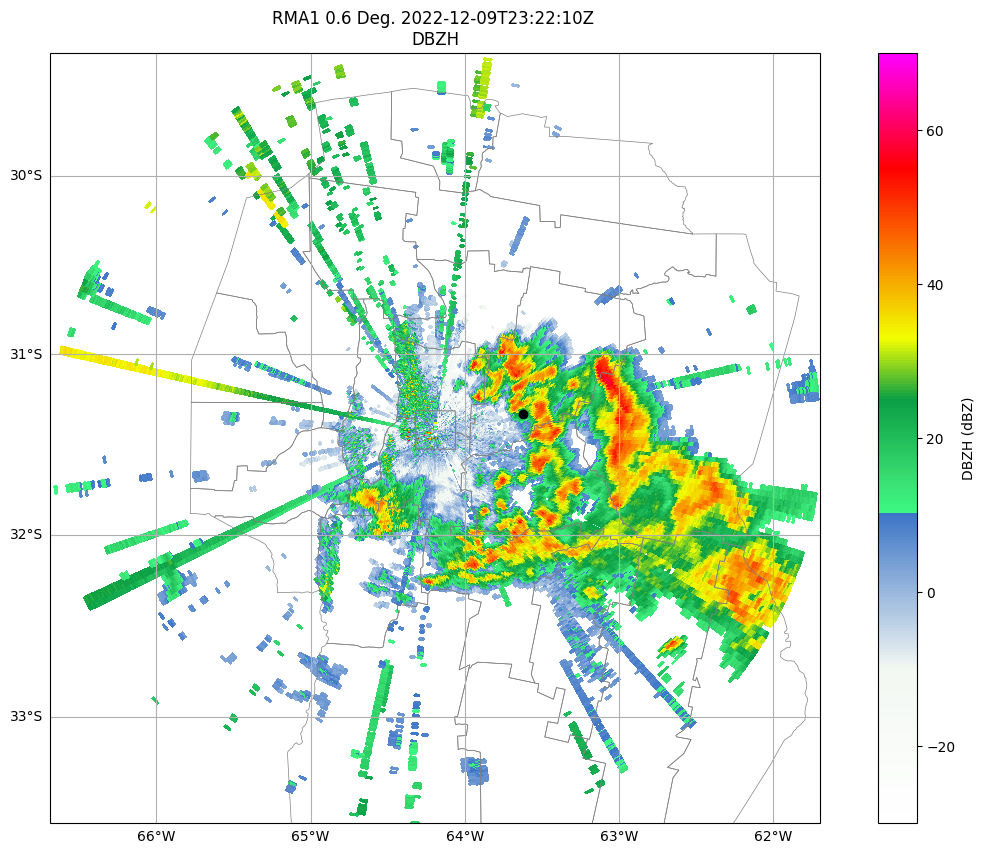

In [30]:
# Creamos objeto figura y le asignamos un tamaño
fig = plt.figure(figsize=(15,10))
# Creamos un objeto display con los datos del volumen
display = pyart.graph.RadarMapDisplay(radar)

# Definimos la proyección con la que vamos a graficar
projection = ccrs.Mercator() # PlateCarree

# Grafico de DBZH
ax1 = plt.subplot(1,1,1, projection=projection)
display.plot_ppi_map(field='DBZH', sweep=0, vmin=-30, vmax=70,
                     cmap='grc_th', ax=ax1,
                     projection=projection,
                     lat_lines=[-30,-31,-32,-33],
                     lon_lines=[-62,-63,-64,-65,-66],
                     shapefile=path_shapes,
                     shapefile_kwargs={'zorder':1,'facecolor':'None', 'edgecolor':'grey', 'alpha':1,'lw':.5})

# Graficamos un punto de referencia en el mapa
display.plot_point(-63.624216, -31.331574, 'o', color='black')

**Hacemos zoom para ver mejor:**

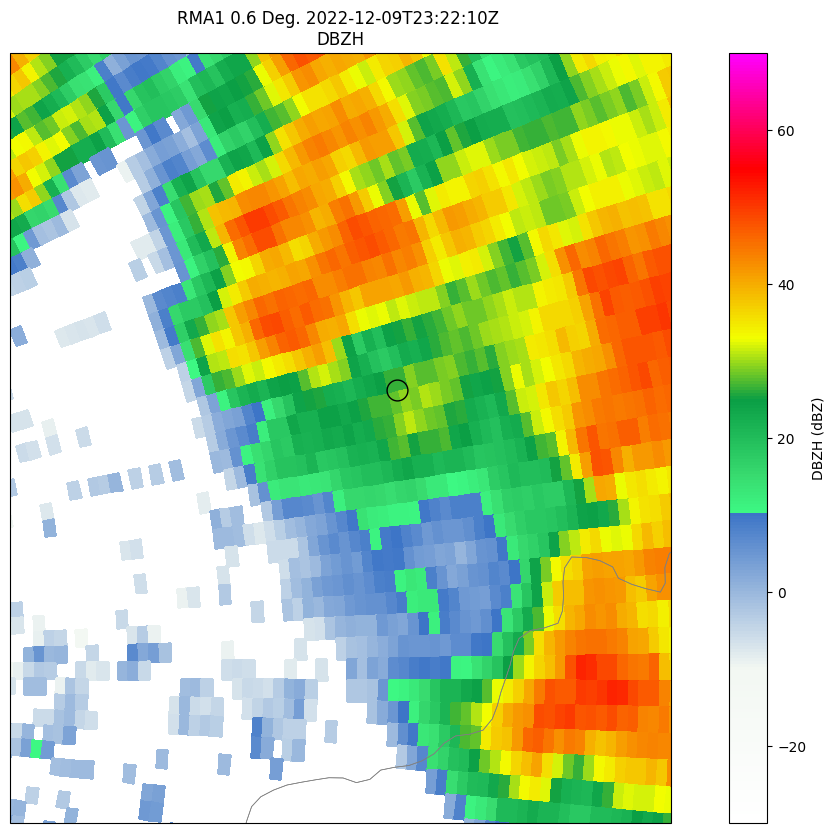

In [31]:
# Región donde queremos hacer el zoom
# Latitud minima y máxima
min_lat=-31.5
max_lat=-31.2
# Longitud minima y máxima
min_lon=-63.8
max_lon=-63.5

# Creamos objeto figura y le asignamos un tamaño
fig = plt.figure(figsize=(15,10))
# Creamos un objeto display con los datos del volumen
display = pyart.graph.RadarMapDisplay(radar)

# Definimos la proyección con la que vamos a graficar
projection = ccrs.Mercator() # PlateCarree

# Grafico de DBZH
ax1 = plt.subplot(1,1,1, projection=projection)
display.plot_ppi_map(field='DBZH', sweep=0, vmin=-30, vmax=70,
                     cmap='grc_th', ax=ax1,
                     projection=projection,
                     lat_lines=[-30,-31,-32,-33],
                     lon_lines=[-62,-63,-64,-65,-66],
                     min_lon=min_lon, max_lon=max_lon,
                     min_lat=min_lat, max_lat=max_lat,
                     shapefile=path_shapes,
                     shapefile_kwargs={'zorder':1,'facecolor':'None', 'edgecolor':'grey', 'alpha':1,'lw':.5})

# Graficamos un punto de referencia en el mapa
display.plot_point(-63.624216, -31.331574, 'o',
                   markerfacecolor="None",
                   markeredgecolor='black',
                   ms=15)

## **La estimación de lluvia más común y básica se hace a través de relaciones Z-R. Este tipo de relaciones transforman el factor de reflectividad a tasa de precipitación.**


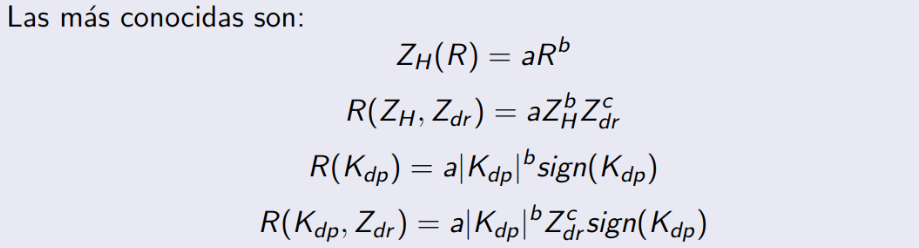

Battan en 1973 presentó una lista de 69 relaciones Z-R y Raghavan en 2013 otras 30.

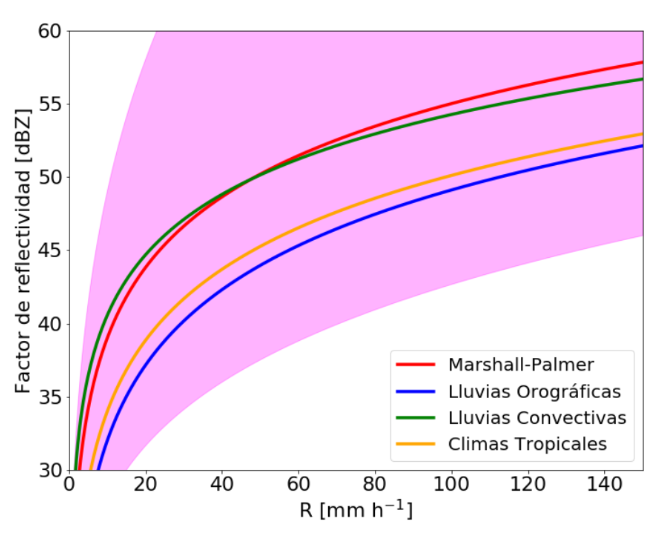

## **Calculamos un estimativo de la tasa de precipitación a partir del factor de reflectividad horizontal utilizando una relación de <font color='red'>Z-R</font> de Marshall y Palmer <font color='green'>$Z=200R^{1.6}$</font>**

### Nota: Z está en unidades lineales:
### $Z[dBZ] = log_{10}(Z[\frac{mm^{6}}{m^{3}}])$
### $Z[\frac{mm^{6}}{m^{3}}] = 10^{\frac{Z[dBZ]}{10}}$

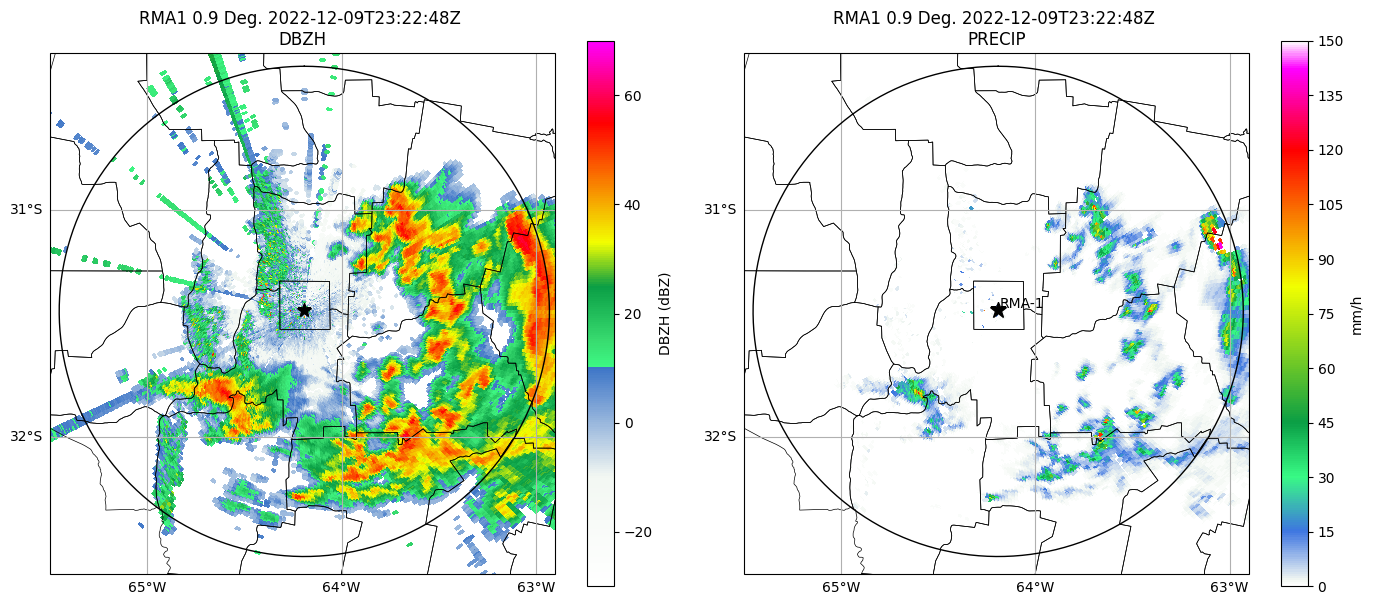

In [32]:
##########################################################################################################################
##########################################################################################################################
# RHOHV limite a partir del cual se estima precipitacion
rho_lim = 0.9
# Elevación que queremos graficar (0 para elevacion mas baja)
elevacion = 1

# Configuramos ventana de visualizacion
min_lon=-65.5 # lado oeste
max_lon=-62.9 # lado este
min_lat=-32.6 # lado sur
max_lat=-30.3 # lado norte

# min_lon=-63.6
# max_lon=-62.9
# min_lat=-31.6
# max_lat=-30.9
##########################################################################################################################
##########################################################################################################################
# Maxima precipitación para la escala de colores
max_precip = 150

# Enmascaramos aquellos ecos no meteorologicos
filtered_field = np.ma.masked_where(radar.fields['RHOHV']['data'] < rho_lim, radar.fields['DBZH']['data'] )
# Pasamos el factor de reflectividad de dBZ a unidades lineales mm**6/m**3
linear_filtered_field = 10**(filtered_field/10)
# Calculamos la precipitación a traves de nuestra relación Z-R
precip_field = (linear_filtered_field/200)**(1/1.6)
# La agregamos al volumen como un campo mas
radar.add_field_like('DBZH', 'PRECIP', precip_field, replace_existing=True)
# Le declaramos las unidades
radar.fields['PRECIP']['units'] = 'mm/h'

# Creamos figura y objeto display
fig = plt.figure(figsize=[14,6])
display = pyart.graph.RadarMapDisplay(radar)

projection = ccrs.Mercator() #PlateCarree

# Grafico de DBZH

# ax1 = plt.subplot(1, 2, 1, projection=projection)
# display.plot_ppi_map('DBZH', elevacion, vmin = -30, vmax = 70, cmap='grc_th', ax=ax1,
#                      projection=projection)

ax1 = plt.subplot(1, 2, 1, projection=projection)
display.plot_ppi_map('DBZH', elevacion, vmin = -30, vmax = 70, cmap='grc_th', ax=ax1,
                     projection=projection, lat_0=radar.latitude['data'][0], lon_0=radar.longitude['data'][0],
                     lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66],
                     shapefile=path_shapes, shapefile_kwargs=shapes_kwargs,
                     min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat)
# Graficamos circunferencias de radio (en km) definido en la lista
display.plot_range_rings([120, 240], ax=None, lw=1)
# Graficamos un punto de referencia en el mapa
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', color='black', ms=10)

# Grafico de la PRECIPITACION

# ax2 = plt.subplot(1, 2, 2, projection = projection)
# display.plot_ppi_map('PRECIP', elevacion, vmin = 0, vmax = 50,
#                      cmap = 'grc_rain', ax=ax2,
#                      ticks=np.linspace(0,50,11), projection = projection,
#                      colorbar_flag=True, colorbar_label = 'mm/h')

ax2 = plt.subplot(1, 2, 2, projection = projection)
display.plot_ppi_map('PRECIP', elevacion, vmin = 0, vmax = max_precip, cmap = 'grc_rain', ax=ax2,
                     ticks=np.linspace(0,max_precip,11), projection = projection, lat_0 = radar.latitude['data'][0],
                     lon_0 = radar.longitude['data'][0],
                     shapefile=path_shapes, shapefile_kwargs=shapes_kwargs,
                     colorbar_flag=True, colorbar_label = 'mm/h', lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66],
                     min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat)
# Graficamos circunferencias de radio (en km) definido en la lista
display.plot_range_rings([120], ax=None, lw=1)
# Graficamos un punto de referencia en el mapa
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', 'RMA-1', color='black', ms=12)

plt.tight_layout()
plt.show()

## **Estimamos la precipitación acumulada durante el evento**



In [46]:
##########################################################################################################################
##########################################################################################################################

# RHOHV limite a partir del cual se estima precipitacion
rho_lim = 0.9

# Elevación que queremos graficar (0 para elevacion mas baja)
elevacion = 1

##########################################################################################################################
##########################################################################################################################
# Maxima precipitación para la escala de colores
max_precip = 35

# Delta t para el cual se transforma tasa de precipitacion a precipitacion acumulada
delta_t = 10    # En minutos
projection = ccrs.Mercator() #PlateCarree

for filename in lista_de_archivos:
    try:
        # Comando de lectura
        radar = pyart.io.read(filename, include_fields=['DBZH','RHOHV'])
        # print('Procesando ',filename)

        # Filtro el campo segun un umbral en RHOHV
        filtered_field = np.ma.masked_where(radar.fields['RHOHV']['data'] < rho_lim, radar.fields['DBZH']['data'] )
        filtered_field = filtered_field.filled(fill_value=-30)

        min_lon=radar.longitude['data'][0]-1.4
        max_lon=radar.longitude['data'][0]+1.4
        min_lat=radar.latitude['data'][0]-1.4
        max_lat=radar.latitude['data'][0]+1.4
    except:
        continue

    # Convierto la reflectivdad en mm**6/mm**3
    linear_filtered_field = 10**(filtered_field/10)
    # Calculo la tasa de precipitacion en mm/h
    temp_precip = (linear_filtered_field/200)**(1/1.6)
    # Calculo la precipitacion acumulada en un periodo delta t
    temp_precip = temp_precip*delta_t/60

    if filename == lista_de_archivos[0]:
        precip_field = temp_precip.copy()
    else:
        # Calculo el acumulado
        precip_field = temp_precip+precip_field

    # print(precip_field[100,25:30])
    # Agrego el nuevo campo al objeto radar
    radar.add_field_like('DBZH', 'PRECIP', precip_field, replace_existing=True)
    # Le doy las unidades correspondientes
    radar.fields['PRECIP']['units'] = 'mm'

    display = pyart.graph.RadarMapDisplay(radar)

    # Figura a crear, de proporciones pulgadas ancho x pulgadas alto, modo ajustado.
    fig = plt.figure(figsize=[11,5], tight_layout=True)

    # Grafico de DBZH
    ax1 = plt.subplot(1, 2, 1, projection=projection)
    display.plot_ppi_map('DBZH', elevacion, vmin = -30, vmax = 70, cmap='grc_th', ax=ax1,
                         projection=projection, lat_0=radar.latitude['data'][0], lon_0=radar.longitude['data'][0],
                         lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66],
                         shapefile=path_shapes, shapefile_kwargs=shapes_kwargs,
                         min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat)
    # Graficamos circunferencias de radio (en km) definido en la lista
    display.plot_range_rings([60, 120], ax=None, lw=1, ls='--')
    # Graficamos un punto de referencia en el mapa
    display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', 'RMA-1',
                       color='black', ms=15, label_offset=(0.08, 0.08))

    # Grafico de PRECIPITACION
    ax2 = fig.add_subplot(1, 2, 2, projection=projection)
    display.plot_ppi_map('PRECIP', elevacion, vmin = 0, vmax = max_precip, cmap = 'grc_rain', ax = ax2,
                         ticks=np.linspace(0,max_precip,11), resolution='10m',
                         projection = projection, lat_0 = radar.latitude['data'][0],
                         lon_0 = radar.longitude['data'][0],
                         shapefile=path_shapes, shapefile_kwargs=shapes_kwargs,
                         alpha = 1, colorbar_flag=True,
                         colorbar_label = 'mm', lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66],
                         min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat)

    # Graficamos circunferencias de radio (en km) definido en la lista
    display.plot_range_rings([60,120], ax=None, lw=1, ls='--')
    # Graficamos un punto de referencia en el mapa
    display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', 'RMA-1',
                       color='black', ms=15, label_offset=(0.08, 0.08))

    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

## **Extraemos la serie temporal de estimación de precipitación sobre un punto**


In [34]:
# Elegimos un punto, por ejemplo la localidad de Arroyito
latitud  = -31.4229314
longitud = -63.0534119

gate, alfa = get_nearest_gate_azimuth(radar, longitud, latitud, verbose=True)

-----------------------------------------------
Angulo donde se ubica la estacion: 89.21187957795475 ° contando desde el norte geografico
El pluviometro esta a 108.03822523431296 km del radar
89 ° es el angulo redondeado
gate más cercano: 236
Coordenadas del centro del gate 236 con azimuth 89 :
Latidud     Longitud Altitud
-31.419281 -63.050995 2137.0
-----------------------------------------------


In [47]:
# Importamos pandas para guardar la serie temporal
import pandas as pd
# Importamos libreria para trabajar con series temporales
from datetime import datetime

# Iteramos sobre todos los volumenes de radar

# RHOHV limite a partir del cual se estima precipitacion
rho_lim = 0.8

# Delta t para el cual se transforma tasa de precipitacion a precipitacion acumulada
delta_t = 10

# Inicializamos una variable para calcular la precipitacion acumulada
acc_precip = 0

# Inicializamos un DataFrame para la serie extraida
serie = pd.DataFrame()

for filename in lista_de_archivos:
    try:
        # Comando de lectura
        radar = pyart.io.read(filename, include_fields=['DBZH','RHOHV'])

        # Filtro el campo segun un umbral en RHOHV
        filtered_value = np.ma.masked_where(radar.fields['RHOHV']['data'][alfa,gate] < rho_lim, radar.fields['DBZH']['data'][alfa,gate] )
        filtered_value = filtered_value.filled(fill_value=-30)

        # Extraemos valor de DBZH y RHOHV sobre el punto geografico
        rhohv_value = radar.fields['RHOHV']['data'][alfa,gate]
        dbzh_value  = radar.fields['DBZH']['data'][alfa,gate]

        # Convierto la reflectivdad en mm**6/mm**3
        linear_filtered_value = 10**(filtered_value/10)
        # Calculo la tasa de precipitacion en mm/h
        temp_precip = (linear_filtered_value/200)**(1/1.6)
        # Calculo la precipitacion acumulada en un periodo delta t y sumamos
        acc_precip = acc_precip + temp_precip*delta_t/60

        # Extraemos la fecha y hora del volumen de radar
        datetime_object = datetime.strptime(radar.time['initial_sweep_time'][0],
                                            '%Y%m%dT%H%M%S')

        # Creamos dataframe temporal para guardar los resultados
        temp_df = pd.DataFrame({'DBZH'     : [dbzh_value],
                               'RHOHV'     : [rhohv_value],
                               'RAINRATE'  : [temp_precip],
                               'ACUMULADO' : [acc_precip]},
                               index       = [datetime_object])

        serie = pd.concat([serie,temp_df])

    except Exception as error:
        print('Ocurrió un error! ',error)
        continue

In [48]:
# Nos fijamos en la serie
serie

,DBZH,RHOHV,RAINRATE,ACUMULADO
2022-12-09 23:08:32,41.779263,0.874438,14.895674,2.482612
2022-12-09 23:21:32,33.410805,0.959476,4.467160,3.227139
2022-12-09 23:34:33,20.628300,0.983973,0.709782,3.345436
2022-12-09 23:59:33,13.592217,0.849136,0.257852,3.388411
2022-12-10 00:12:31,5.665106,0.502258,0.000486,3.388492
2022-12-10 00:25:29,46.141369,0.978189,27.905628,8.039430
2022-12-10 00:38:29,34.632935,0.986881,5.326166,8.927125
2022-12-10 00:51:32,32.799061,0.980170,4.090699,9.608908


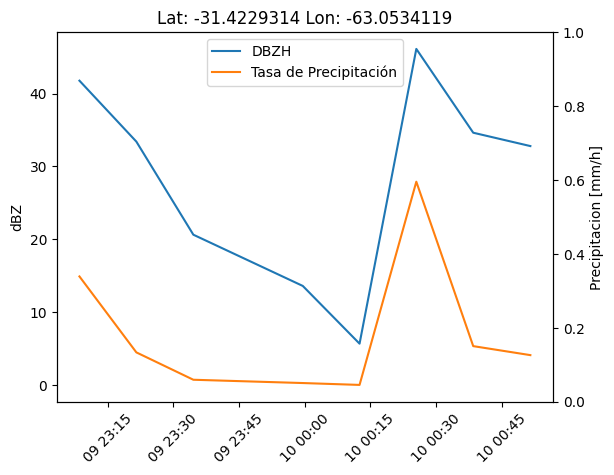

In [49]:
# Graficamos nuestros resultados
plt.plot(serie.index, serie['DBZH'], label='DBZH')
plt.plot(serie.index, serie['RAINRATE'], label='Tasa de Precipitación')

plt.legend()
plt.xticks(rotation=45)
plt.ylabel('dBZ')
plt.title('Lat: '+str(latitud)+' Lon: '+str(longitud))

ax = plt.gca().twinx()
ax.set_ylabel("Precipitacion [mm/h]")

plt.show()

In [ ]:
# Podemos exportar la serie anterior a un archivo .csv
serie.to_csv('serie_radar.csv')

## **Graficamos una variables en función del rango**

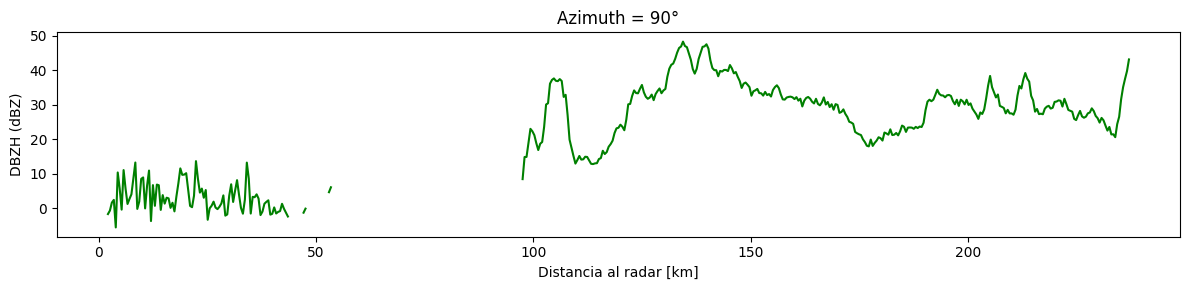

In [50]:
display = pyart.graph.RadarDisplay(radar)

# Barrido de interés
sweep = 0
# ángulo contando en sentido horario desde el norte
angulo = 90

# Campo a graficar
campo = 'DBZH'
# rayo es el ángulo más el barrido por el entero sweep que representa la elevación
rayo = angulo + sweep*360

# Figura a crear, de proporciones pulgadas ancho x pulgadas alto, modo ajustado.
fig= plt.figure(figsize=[12,3], tight_layout=True)
display.plot_ray(campo, rayo, format_str='g-', title='Azimuth = '+str(rayo)+'°', fig=fig)

plt.xlabel('Distancia al radar [km]')
plt.show()

# *Contacto: matias.suarez@unc.edu.ar*

# 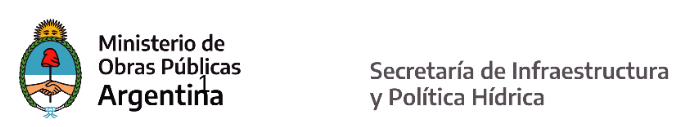

# 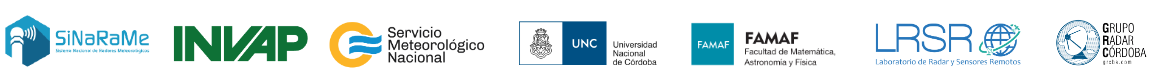